# project : company_products_Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

#### This dataset is the data of company products three products ['Accessories' ,'bikes' , colthings'] from 2013 to 2016 ,  A number of characteristics about the purchases are included in each row .

#### we want to find information about the factors which affect on the profits.

The data have 16 columns and we will explain each column and jop of it .

1 - Date : the date of the purchase

2- Customer ID 

3- Customer Age

4- Age Group : the group of the age like <20 and >30 ...

5- Customer Gender: male or female

6- Country: the country of the customer

7- State : the State of the customer

8- Product Category : there are three catigories ['Accessories' ,'bikes' , colthings'] 

9- Sub Category : there are (Tires and Tubes , Bottles and Cages , Road Bikes , Helmets , Mountain Bikes, Jerseys , Caps,       

                        Fenders ,Touring Bikes,Gloves,Cleaners,Shorts,Hydration Packs,Socks,Vests,Bike Racks,Bike Stands)

10- Product : the product which selled

11- Order Quantity : the quantitiy of the purchase

12- Unit Cost : the cost of one unit of the product

13- Unit Price : the price of one unit of the product

14- Cost : the cost of purchase

15- Revenue : the revenue of the purchase

16- Profit : the profit of the purchase

### Question(s) for Analysis :

1-what are products that company product and how many company product for each one

2- what is the categories of accessories that company products and how many company product for each one

3-what is the categories of Bikes that company products and how many company product for each one

4-what is the categories of Clothing that company products and how many company product for each one

5- what is the best areas which give us a max profit and what is there products

6-what is the best 10 product has the big profit

7- what is the best age_group which give us a max profit and what is there products


<a id='wrangling'></a>
## Data Wrangling

### gathering data

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
# import the libraries that you use
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [11]:
# load the data
df = pd.read_csv('company.csv')

In [12]:
# print out a few lines
df.head()

,Date,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,26/11/2013,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8.0,45.0,120.0,360.0,950,590.0
1,26/11/2015,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8.0,45.0,120.0,360.0,950,590.0
2,23/03/2014,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23.0,45.0,120.0,1035.0,2401,1366.0
3,23/03/2016,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20.0,45.0,120.0,900.0,2088,1188.0
4,15/05/2014,11046.0,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4.0,45.0,120.0,180.0,418,238.0


### Accessing and cleaning data

In [13]:
# the shape of the dataframe
df.shape

(113037, 17)

In [14]:
# get the summary statistics
df.describe()

,Customer ID,Customer Age,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
count,113036.000000,113036.000000,25982.000000,113036.000000,113037.000000,113036.000000,113036.000000,1.130370e+05,113036.000000
mean,19227.874341,35.919212,47.313063,11.901660,267.296366,452.938427,469.318695,1.508727e+03,285.051665
std,5307.581302,11.021936,6.860797,9.561857,549.833051,922.071219,884.866118,2.536256e+05,453.887443
min,11000.000000,17.000000,38.000000,1.000000,1.000000,2.000000,1.000000,2.000000e+00,-30.000000
25%,14611.000000,28.000000,42.000000,2.000000,2.000000,5.000000,28.000000,6.300000e+01,29.000000
50%,18664.000000,35.000000,46.000000,10.000000,9.000000,24.000000,108.000000,2.230000e+02,101.000000
75%,23475.000000,43.000000,52.000000,20.000000,42.000000,70.000000,432.000000,8.000000e+02,358.000000
max,29483.000000,87.000000,62.000000,32.000000,2171.000000,3578.000000,42978.000000,8.527101e+07,15096.000000


In [15]:
# show the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113037 entries, 0 to 113036
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113037 non-null  object 
 1   Customer ID       113036 non-null  float64
 2   Customer Age      113036 non-null  float64
 3   Age Group         113036 non-null  object 
 4   Customer Gender   113036 non-null  object 
 5   Country           113036 non-null  object 
 6   State             113036 non-null  object 
 7   Product Category  113036 non-null  object 
 8   Sub Category      113036 non-null  object 
 9   Product           113036 non-null  object 
 10  Frame Size        25982 non-null   float64
 11  Order Quantity    113036 non-null  float64
 12  Unit Cost         113037 non-null  float64
 13  Unit Price        113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113037 non-null  int64  
 16  Profit            11

In [16]:
#from the data info we see that Frame Size column has many nans 
# so we will drop it
df.drop('Frame Size', axis = 1 , inplace= True)

In [17]:
# then make sure that is removed
df.shape[1]

16

the column already droped

In [18]:
# check the missing values 
df.isnull().sum().any()

True

In [19]:
# remove the missing values
df.dropna(inplace = True)

In [20]:
# make sure that there isn't missing values 
df.isnull().sum().any()

False

great , there is no any missing values

In [21]:
# check the duplicated values 
sum(df.duplicated())

1000

there are 1000 duplicates so we will remove it

In [22]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [23]:
# make sure that is duplicates removed
sum(df.duplicated())

0

then , there is no any duplicates

In [24]:
# fix the columns lables and print the new labels
df.rename(columns = lambda x : x.strip().lower().replace(" ","_"),inplace= True)
df.columns

Index(['date', 'customer_id', 'customer_age', 'age_group', 'customer_gender',
       'country', 'state', 'product_category', 'sub_category', 'product',
       'order_quantity', 'unit_cost', 'unit_price', 'cost', 'revenue',
       'profit'],
      dtype='object')

In [25]:
# show the dataframe after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              112036 non-null  object 
 1   customer_id       112036 non-null  float64
 2   customer_age      112036 non-null  float64
 3   age_group         112036 non-null  object 
 4   customer_gender   112036 non-null  object 
 5   country           112036 non-null  object 
 6   state             112036 non-null  object 
 7   product_category  112036 non-null  object 
 8   sub_category      112036 non-null  object 
 9   product           112036 non-null  object 
 10  order_quantity    112036 non-null  float64
 11  unit_cost         112036 non-null  float64
 12  unit_price        112036 non-null  float64
 13  cost              112036 non-null  float64
 14  revenue           112036 non-null  int64  
 15  profit            112036 non-null  float64
dtypes: float64(7), int64

The data is really clean now and there is no null or duplicated values and columns type were fixed 

ok,we can continue now

<a id='eda'></a>


## Exploratory Data Analysis



### what are products that company product and how many company product for each one

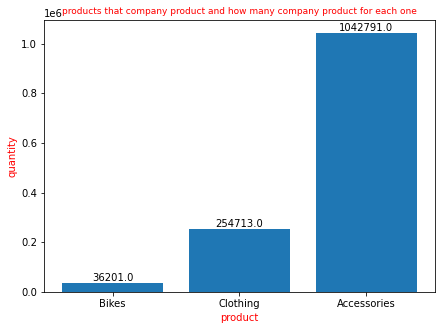

In [136]:
# plot the categories
products_quantities = pd.DataFrame(df.groupby('product_category')['order_quantity'].sum()).sort_values(['order_quantity'],ascending= True)
y =list(products_quantities['order_quantity'].values)
x = list(products_quantities.index)
plt.figure(figsize = (7,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('products that company product and how many company product for each one', color= 'r',fontsize =9 )
plt.xlabel('product' , color ='r')
plt.ylabel('quantity', color ='r');

then company producted :

1042791.0 unit of Accessories 

36201.0 unit of bikes

254713.0 unit of Clothing

### what is the categories of accessories that company products and how many company product for each one

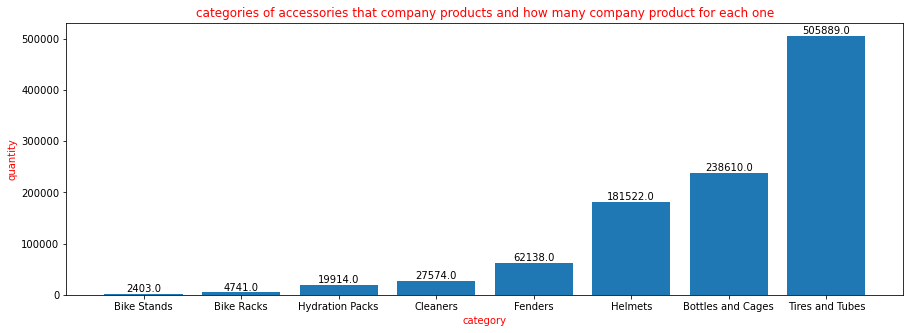

In [70]:
# plot the categories of accessories
df_Accessories = pd.DataFrame(df.query(" product_category == 'Accessories' ").groupby('sub_category')['order_quantity'].sum()).sort_values(['order_quantity'],ascending=True)
y =list(df_Accessories['order_quantity'].values)
x = list(df_Accessories.index)
plt.figure(figsize = (15,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('categories of accessories that company products and how many company product for each one', color= 'r')
plt.xlabel('category' , color ='r')
plt.ylabel('quantity', color ='r');

### what is the categories of Bikes that company products and how many company product for each one

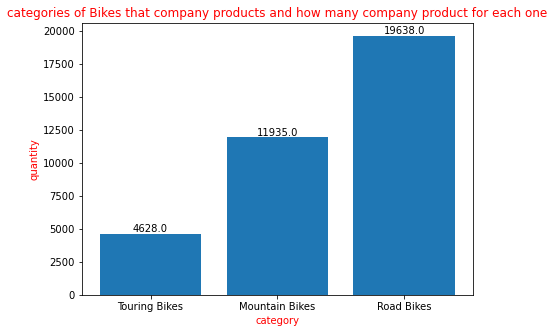

In [73]:
# plot the categories of bikes
df_bikes =  pd.DataFrame(df.query(" product_category == 'Bikes' ").groupby('sub_category')['order_quantity'].sum()).sort_values(['order_quantity'],ascending=True)
y =list(df_bikes['order_quantity'].values)
x = list(df_bikes.index)
plt.figure(figsize = (7,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('categories of Bikes that company products and how many company product for each one', color= 'r')
plt.xlabel('category' , color ='r')
plt.ylabel('quantity', color ='r');

### what is the categories of Clothsthat company products and how many company product for each one

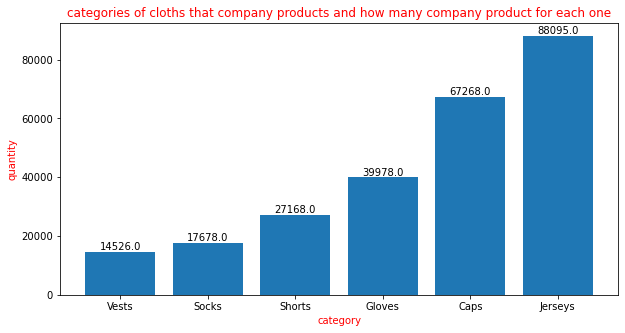

In [75]:
# plot the categories of clothes
df_Clothing = pd.DataFrame(df.query(" product_category == 'Clothing' ").groupby('sub_category')['order_quantity'].sum()).sort_values(['order_quantity'],ascending=True)
y =list(df_Clothing['order_quantity'].values)
x = list(df_Clothing.index)
plt.figure(figsize = (10,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('categories of cloths that company products and how many company product for each one', color= 'r')
plt.xlabel('category' , color ='r')
plt.ylabel('quantity', color ='r');

### what is the best areas which give us a max profit and what is the products of the max area

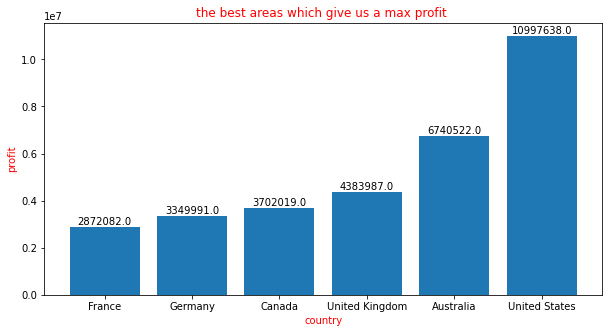

In [76]:
areas = pd.DataFrame(df.groupby('country')['profit'].sum()).sort_values(['profit'],ascending=True)
y =list(areas['profit'].values)
x = list(areas.index)
plt.figure(figsize = (10,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('the best areas which give us a max profit ', color= 'r')
plt.xlabel('country' , color ='r')
plt.ylabel('profit', color ='r');

then united States has the maximum profit and Australia is the next

so we will get all information about the most 10 products of united States

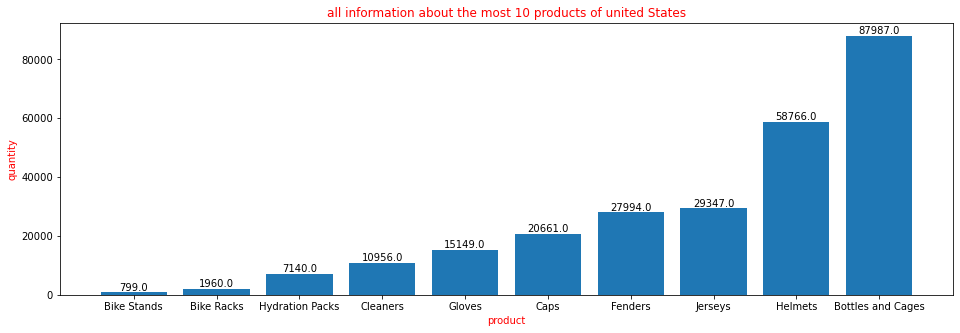

In [77]:
USP= df[df['country']=='United States']
USPro =  pd.DataFrame(USP.groupby('sub_category')['order_quantity'].sum()[0:10]).sort_values(['order_quantity'],ascending=True)
y =list(USPro['order_quantity'].values)
x = list(USPro.index)
plt.figure(figsize = (16,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('all information about the most 10 products of united States', color= 'r')
plt.xlabel('product', color ='r')
plt.ylabel('quantity', color ='r');

### what is the best 10 product has the big profit

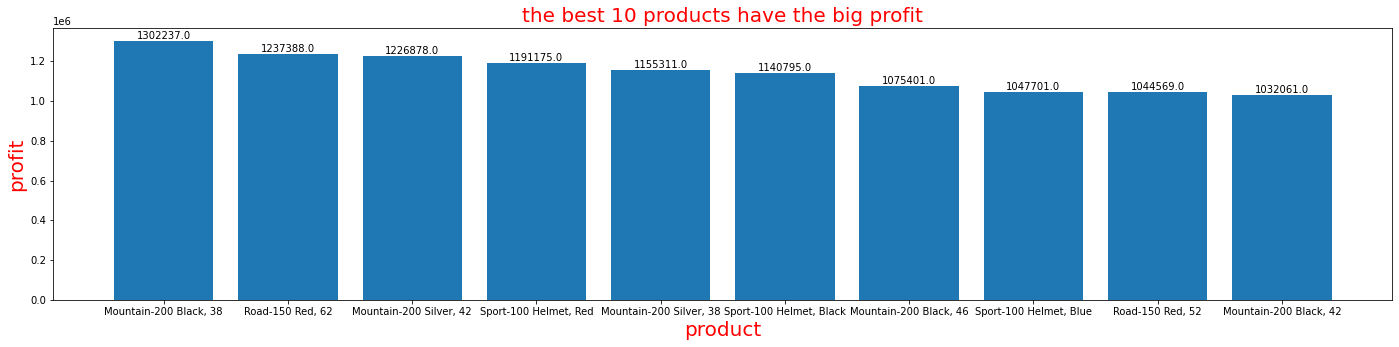

In [93]:
products_profits = pd.DataFrame(df.groupby('product')['profit'].sum()).sort_values(['profit'],ascending=False).head(10)
y =list(products_profits['profit'].values)
x = list(products_profits.index)
plt.figure(figsize = (24,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('the best 10 products have the big profit', color= 'r',fontsize= 20)
plt.xlabel('product', color ='r',fontsize= 20)
plt.ylabel('profit', color ='r',fontsize= 20);

### what is the best age_group which give us a max profit and what is there products

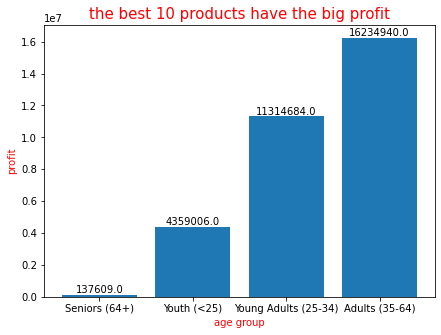

In [108]:
ages = pd.DataFrame(df.groupby('age_group')['profit'].sum()).sort_values(['profit'],ascending = True)
y =list(ages['profit'].values)
x = list(ages.index)
plt.figure(figsize = (7,5))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom')
plt.title('the best 10 products have the big profit', color= 'r',fontsize= 15)
plt.xlabel('age group', color ='r',fontsize= 10)
plt.ylabel('profit', color ='r',fontsize= 10);

then the most age group has the biggest profit is adults(35_64)

so we will get all information about the most 10 products of adults(35_64)

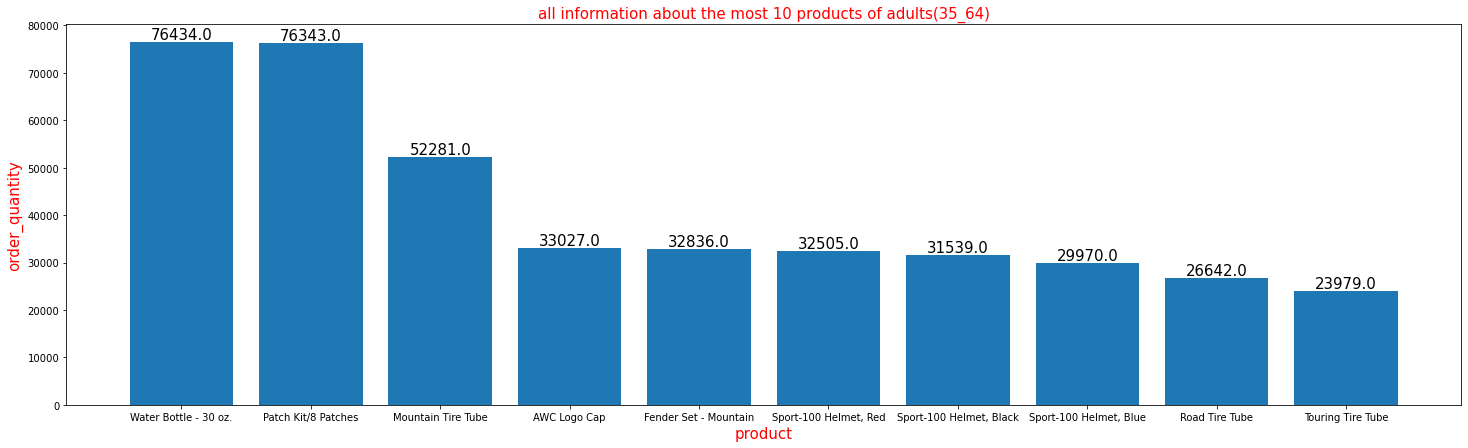

In [130]:
adults35_64= df[df['age_group']=='Adults (35-64)']
adults35_64df = pd.DataFrame(adults35_64.groupby('product')['order_quantity'].sum()).sort_values(['order_quantity'],ascending = False).head(10)
y =list(adults35_64df['order_quantity'].values)
x = list(adults35_64df.index)
plt.figure(figsize = (25,7))
plt.bar(x,y)
for i in range(len(y)):
    plt.text(i,y[i],y[i], ha ='center', va= 'bottom',fontsize= 15)
plt.title('all information about the most 10 products of adults(35_64)', color= 'r',fontsize= 15)
plt.xlabel('product', color ='r',fontsize= 15)
plt.ylabel('order_quantity', color ='r',fontsize= 15);

<a id='conclusions'></a>
## Conclusions

Ok, here we finished our analysis process

let's look over the project and summrize the steps :

### step_1 : data wrangling

we gathered the data then moved to access and clean it and we did that :

1- we cleaned the data from the null values

2- we drpoed the duplicated values

3- we removed the outlires and fixed the columns dtype

4- we selected the columns that we need to analysis process and dropped the others

### step_2 : EDA

first we had broken the data and get all details about the products , then we started to ask our questions to get ansewrs:

1- the best areas which give us a max profit and we get it the united States and we got all information about the most 10 products of it

2- the best 10 product has the big profit and the best was mountian-200black, 38

3- the best age_group which give us a max profit and we get it the young adults(35_64) and we got all information about the most 10 products of it
